In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from datetime import datetime as dt
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
new = pd.read_csv("new2.csv")

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
new = reduce_mem_usage(new, verbose=True)

Mem. usage decreased to 164.74 Mb (59.3% reduction)


In [11]:
new.dtypes

Unnamed: 0                       int32
Unnamed: 0.1                     int32
authorized_flag                 object
card_id                         object
city_id                          int16
category_1                      object
installments                     int16
category_3                      object
merchant_category_id             int16
merchant_id                     object
month_lag                         int8
purchase_amount                float16
purchase_date           datetime64[ns]
category_2                     float16
state_id                          int8
subsector_id_x                    int8
feature_1                         int8
feature_2                         int8
feature_3                         int8
first_active_month              object
subsector_id_y                    int8
purchase_year                    int16
purchase_month                    int8
purchase_day                      int8
purchase_hour                     int8
purchase_minute          

In [44]:
len(new["merchant_id"].unique())

226127

In [94]:
len(new["card_id"].unique())

290001

In [9]:
#날짜 데이터 타입 바꿔주기
def todt(data, dformat):
    l = []
    for i in data:
        a = dt.strptime(i, dformat)
        l.append(a)
        
    return l

In [10]:
temp = todt(new["purchase_date"], "%Y-%m-%d %H:%M:%S")
new["purchase_date"] = temp

In [69]:
gc.collect()

8723

In [70]:
cate2 =list(new["category_2"].unique())

In [71]:
cate2

[1.0, 3.0, 4.0, 2.0, 5.0, nan]

In [32]:
city =list(his["city_id"].unique())

In [73]:
cate2 = new["category_2"]
temp = []
for i in cate2:
    if np.isnan(i):
        temp.append(-99)
    else:
        temp.append(i)

In [74]:
new["cate2_fillna"] = temp

In [75]:
def categorize(df, inputcol, outputcol):
    mcl = df[inputcol].unique()
    dic2 = {}
    for i in mcl:
        dic2[i] = len(df[df[inputcol]==i].groupby(outputcol).size())
    return dic2
#     if dic2.values()

In [85]:
c_s = categorize(new, "city_id", "cate2_fillna")

In [77]:
def categorize2(df, inputcol, outputcol):
    dic1 ={}

    for i in range(len(df)):
        key = df[outputcol][i]
        val = df[inputcol][i]
        if key in dic1:
            dic1[key].add(val)
        else: 
            dic1[key] =set([val])
            
    return dic1

In [92]:
categorize2(new, "cate2_fillna", "city_id")

{107: {1.0, 4.0, 5.0},
 140: {1.0},
 231: {1.0},
 69: {1.0},
 246: {3.0},
 271: {1.0},
 17: {4.0},
 264: {2.0},
 223: {5.0},
 143: {5.0},
 149: {1.0, 5.0},
 4: {2.0},
 87: {3.0},
 329: {1.0},
 73: {3.0},
 20: {-99.0, 1.0, 3.0},
 322: {-99.0, 2.0, 3.0, 4.0, 5.0},
 19: {1.0},
 117: {1.0, 2.0, 3.0, 4.0, 5.0},
 333: {1.0, 5.0},
 260: {5.0},
 41: {5.0},
 233: {1.0},
 168: {1.0},
 56: {5.0},
 162: {5.0},
 150: {5.0},
 213: {1.0},
 274: {1.0},
 283: {1.0},
 100: {1.0},
 60: {1.0},
 137: {3.0},
 327: {1.0},
 171: {5.0},
 -1: {-99.0},
 25: {3.0},
 57: {1.0, 5.0},
 158: {1.0},
 3: {1.0},
 88: {1.0},
 331: {-99.0, 1.0, 2.0, 3.0, 4.0, 5.0},
 11: {2.0},
 291: {1.0},
 295: {1.0},
 101: {4.0},
 229: {1.0},
 116: {1.0},
 160: {5.0},
 261: {1.0},
 314: {1.0},
 83: {1.0},
 244: {-99.0, 1.0, 2.0, 3.0, 5.0},
 188: {1.0},
 128: {1.0},
 182: {5.0},
 96: {1.0, 2.0, 5.0},
 172: {4.0},
 33: {1.0},
 76: {3.0},
 242: {1.0},
 24: {1.0},
 44: {5.0},
 247: {5.0},
 320: {4.0},
 208: {2.0},
 159: {1.0},
 266: {1.0, 2

In [55]:
if all(dic2.values()) ==1:
    print("true")

true


In [96]:
c_s.values()

dict_values([3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 5, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## month lag

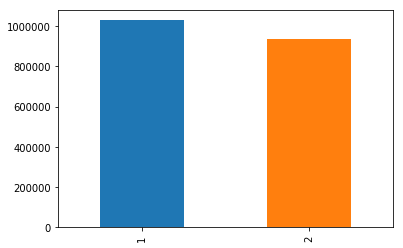

In [16]:
ml = new["month_lag"].value_counts()
ml = ml.sort_index()
ml.plot(kind = "bar")

## purchase date

In [18]:
min(new["purchase_date"]), max(new["purchase_date"])

(Timestamp('2017-03-01 03:24:51'), Timestamp('2018-04-30 23:59:59'))

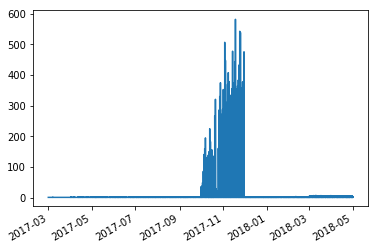

In [19]:
new["purchase_date"].value_counts().plot()

In [ ]:
new["purchase_date"].value_counts().plot(kind = "line")

In [6]:
new.groupby(["purchase_year", "purchase_month"]).size()

purchase_year  purchase_month
2017           3                   1298
               4                  11410
               5                  21031
               6                  23670
               7                  29272
               8                  29981
               9                  33327
               10                 38110
               11                 45173
               12                 70210
2018           1                  84033
               2                 110955
               3                 806899
               4                 657656
dtype: int64

In [7]:
gc.collect()

222

In [22]:
new.groupby(["month_lag", "purchase_year", "purchase_month"]).size()

month_lag  purchase_year  purchase_month
1          2017           3                   1298
                          4                  10342
                          5                  11750
                          6                  12089
                          7                  16093
                          8                  15959
                          9                  18089
                          10                 21455
                          11                 24105
                          12                 41424
           2018           1                  52500
                          2                  67974
                          3                 734535
2          2017           4                   1068
                          5                   9281
                          6                  11581
                          7                  13179
                          8                  14022
                          9              

## authorized flag

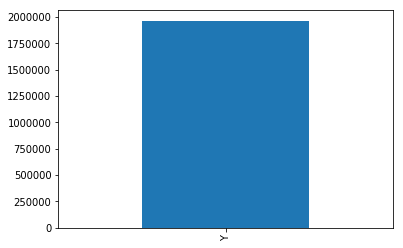

In [23]:
auth = new["authorized_flag"].value_counts()
auth = auth.sort_index()
auth.plot(kind = "bar")

In [25]:
new["authorized_flag"].unique()

array(['Y'], dtype=object)

## category3

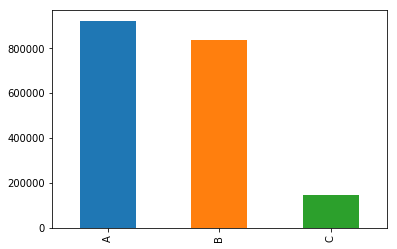

In [26]:
cat3 = new["category_3"].value_counts()
cat3 = cat3.sort_index()
cat3.plot(kind = "bar")

## installment

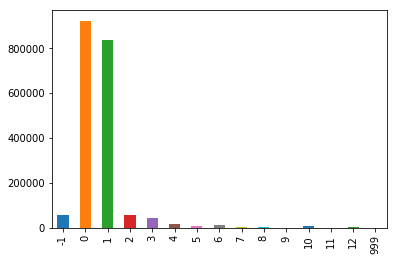

In [27]:
install = new["installments"].value_counts()
install = install.sort_index()
install.plot(kind = "bar")

## category 1

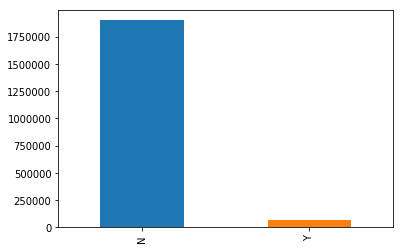

In [28]:
cat1 = new["category_1"].value_counts()
cat1 = cat1.sort_index()
cat1.plot(kind = "bar")

## subsector_id

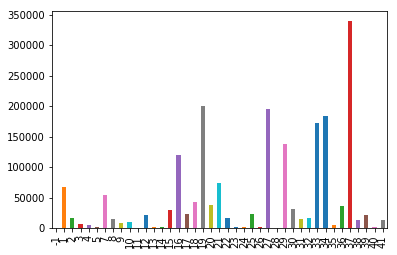

In [30]:
sub_id = new["subsector_id_x"].value_counts()
sub_id = sub_id.sort_index()
sub_id.plot(kind = "bar")

## citi_id, state_id, category2

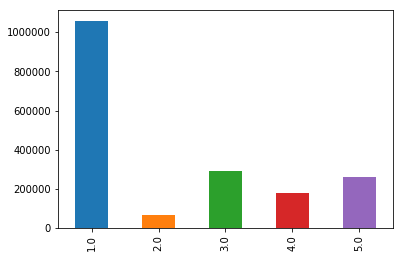

In [31]:
cat2 = new["category_2"].value_counts()
cat2 = cat2.sort_index()
cat2.plot(kind = "bar")

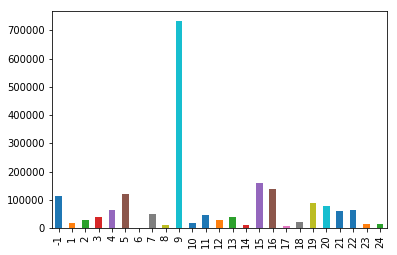

In [33]:
state = new["state_id"].value_counts()
state = state.sort_index()
state.plot(kind = "bar")

In [34]:
city_id = new["city_id"].value_counts()
city_id = city_id.sort_index()
city_id

-1      99348
 1       7414
 2       1418
 3       3036
 4      16672
 6       1672
 7       1476
 8       6590
 9       1444
 10      2268
 11      6583
 12      7423
 13      2317
 14      4910
 16       869
 17     65300
 18       530
 19     70961
 20     13117
 21      9441
 22      1300
 23      1513
 24      5444
 25     28314
 26       517
 28      1425
 29      2570
 30      6092
 32       439
 33      5200
        ...  
 314     8009
 315      262
 316       15
 318     2039
 319       57
 320     3838
 321      597
 322     9956
 323     3061
 325     1791
 326      626
 327      617
 328     1612
 329     2464
 330     2474
 331    41429
 333    31354
 334     4768
 335      600
 336      548
 337     1290
 338     1127
 339     3588
 340     9082
 341     2710
 342     1477
 343      699
 344     9836
 345      718
 347     2687
Name: city_id, Length: 308, dtype: int64

In [35]:
city_id.sort_values()

 185         5
 316        15
 273        23
 92         25
 319        57
 215       145
 207       152
 263       242
 178       245
 306       262
 315       262
 89        276
 204       291
 122       297
 227       357
 205       375
 222       425
 32        439
 130       444
 221       451
 112       460
 254       465
 84        501
 293       510
 71        512
 26        517
 235       520
 18        530
 237       540
 336       548
         ...  
 20      13117
 231     13140
 161     13679
 53      14319
 76      14424
 107     15629
 286     16030
 277     16624
 4       16672
 140     17831
 117     20500
 213     21042
 291     22112
 149     22288
 160     23132
 57      23514
 233     26682
 25      28314
 333     31354
 212     32143
 87      33967
 331     41429
 137     45007
 88      46301
 143     53997
 17      65300
 19      70961
 158     84961
-1       99348
 69     328916
Name: city_id, Length: 308, dtype: int64

In [101]:
corr_new = new.corr()

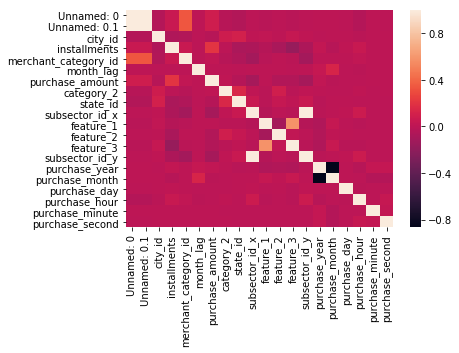

In [103]:
sns.heatmap(corr_new)
plt.show()

In [5]:
nan = new.isnull().sum()
nan

Unnamed: 0                   0
Unnamed: 0.1                 0
authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55921
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111744
state_id                     0
subsector_id_x               0
feature_1                    0
feature_2                    0
feature_3                    0
first_active_month           0
subsector_id_y               0
purchase_year                0
purchase_month               0
purchase_day                 0
purchase_hour                0
purchase_minute              0
purchase_second              0
dtype: int64